In [196]:
import numpy as np
import pandas as pd
import statistics
import scipy.stats as sts
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

import warnings
warnings.simplefilter('ignore')

from pylab import rcParams
rcParams['figure.figsize'] = 10, 8

%matplotlib inline

## 1. Загрузить файл hr.csv

### Описание dataset:
- **satisfaction_level** - уровень удовлетворения сотрудником
- **last_evaluation** - оценка, данная сотруднику на последней аттестации
- **number_project** - число проектов, в которых сотрудник был вовлечен
- **average_monthly_hours** - среднее количество часов, которое сотрудник тратит на работу в месяц
- **time_spend_company** - количество лет, которое сотрудник проработал в компании
- **Work_accident** - были ли инциденты с сотрудником на работе
- **left** - покинул ли работник компанию
- **promoted_last_5years** - был ли сотрудник повышен в должности за последние 5 лет
- **sales** - подразделение компании
- **salary** - уровень зарплаты

In [4]:
data = pd.read_csv('HR.csv')

In [215]:
data.head(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


## 2. Рассчитать основные статистики для переменных: 
- среднее
- медиана 
- мода
- мин/макс 
- сред. отклонение

In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
sales                    14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [42]:
data.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


Посмотрим на выбросы в данных

In [54]:
df_info_null = data.isnull().sum()

print(df_info_null, '\n')

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64 



In [55]:
print('Наименование столбцов в df: {}'.format(data.columns))
print('\nКолличество строк и столбцов в df: {}'.format(data.shape))

Наименование столбцов в df: Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'sales', 'salary'],
      dtype='object')

Колличество строк и столбцов в df: (14999, 10)


**Итого по dataset "HR"** **_(далее df):_**
- В df отсутствуют пропуски
- Выбросов в данных не обнаружено
- Строк в df: 14999
- Столбцов в df: 10

## 3. Рассчитать и визуализировать корреляционную матрицу для переменных

In [193]:
corr_df_p = data.corr(method='pearson')
corr_df_p

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


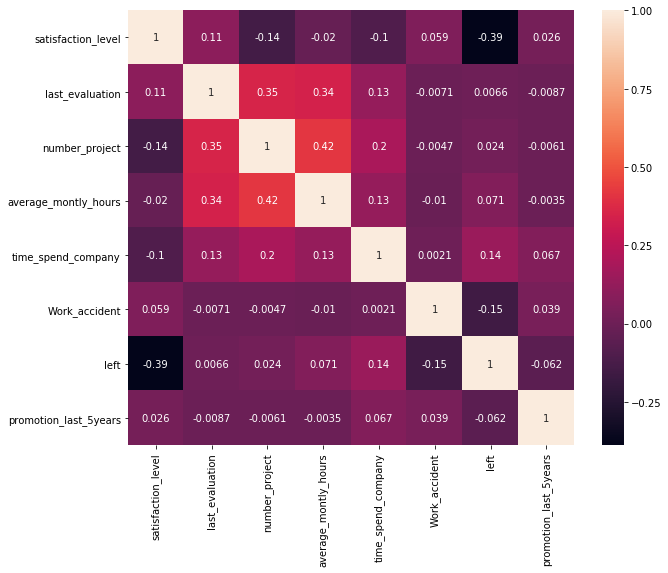

In [32]:
corr_matrix_pearson = data.corr(method='pearson')
sns.heatmap(corr_matrix_pearson, annot=True)
plt.show()

In [194]:
corr_df_s = data.corr(method='spearman')
corr_df_s

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.162407,0.005786,0.062000,-0.139428,0.056333,-0.365842,0.022306
last_evaluation,0.162407,1.000000,0.350399,0.342061,0.161154,-0.005767,-0.002440,-0.007167
number_project,0.005786,0.350399,1.000000,0.397855,0.251971,0.002328,-0.019544,-0.002960
average_montly_hours,0.062000,0.342061,0.397855,1.000000,0.168750,-0.006063,0.046455,-0.002951
time_spend_company,-0.139428,0.161154,0.251971,0.168750,1.000000,-0.027277,0.268876,0.035205
Work_accident,0.056333,-0.005767,0.002328,-0.006063,-0.027277,1.000000,-0.154622,0.039245
left,-0.365842,-0.002440,-0.019544,0.046455,0.268876,-0.154622,1.000000,-0.061788
promotion_last_5years,0.022306,-0.007167,-0.002960,-0.002951,0.035205,0.039245,-0.061788,1.000000


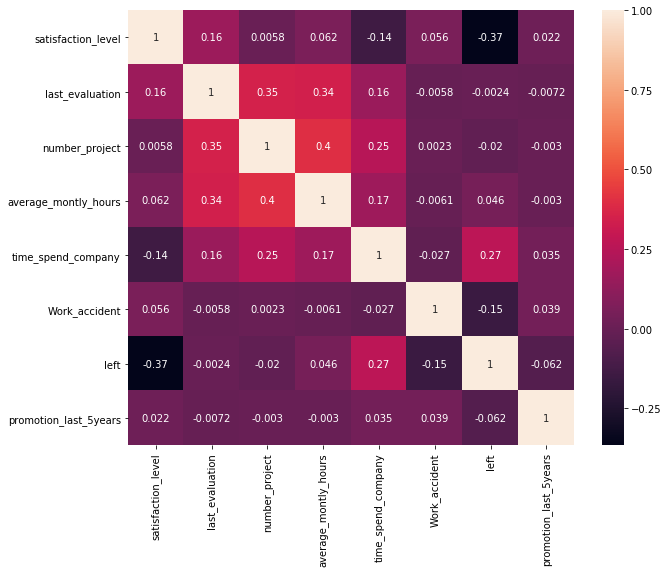

In [34]:
corr_matrix_spearman = data.corr(method='spearman')
sns.heatmap(corr_matrix_spearman, annot=True)
plt.show()

**Итого по матрицам корреляций:**
- слабая обратная корреляция между уходом сотрудника из компании (left) и уровнем его удволетворенности (satisfaction_level)
- слабая корреляция между последней оценкой сотрудника (last_evaluation) и среднем количеством отработанных в месяце часов (average_montly_hours)
- слабая корреляция между количеством проектов на сотруднике (number_project) и последней его оценкой (last_evaluation)
- корреляция между средним количеством рабочих часов в месяц (average_montly_hours) и количеством проектов на сотруднике (number_project)

**Наиболее явные выводы и выдвижение гипотез:**
- Чем больше нагрузки берет на себя сотрудник, тем он более профессионален
- Чем больше нагрузки берет на себя сотрудник, тем его лучше оценивает руководство
- Чем больше проектов у сотрудника, тем больше времени в месяц он тратит
- Чем ниже уровень удовлетворения от работы у сотрудника, тем больше шансов, что он покинет компанию

## 4. Визуализировать несколько взаимосвязей между переменными

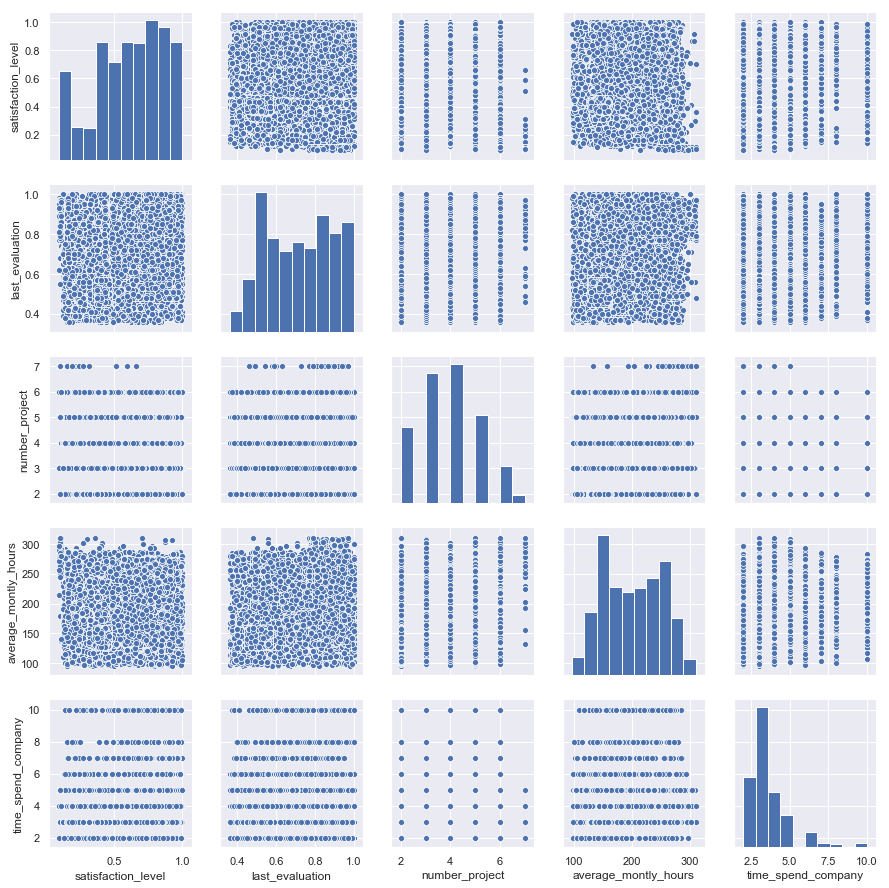

In [62]:
sns.pairplot(data[['satisfaction_level', 'last_evaluation', 'number_project', 
                 'average_montly_hours', 'time_spend_company']])
plt.show()

**Дополнительные выводы исходя из визуализации:**
- У сотрудников с большим количеством проектов, уровень удовлетворенности низкий 
- Сотрудников с высоких и средних значений количеством проектов значительно меньше, чем в группах с меньшим количеством проектов. Это говорит о перегруженности сотрудников, что связанно с уровень удовлетворенности
- Сотрудники, которые мало проработал в компании вероятнее всего дадут большее количество проектов в нагрузку
- Сотрудники, которые проработали от 6 лет и выше, снижают нагрузку. Довольно малая вероятность что сотрудник из группы проработавших большое колличество времени в компании, получит максимальное колличество проектов, где макс колличество проектов = 7

## 5. С использованием t-test статистики проверить взаимосвязи между несколькими переменными

In [232]:
data_t = pd.read_csv('HR.csv')
data_t['salary_class'] = pd.factorize(data_t.salary)[0] + 1
data_t.sample(5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary,salary_class
10650,0.59,0.69,3,162,3,0,0,0,technical,low,1
2693,0.73,0.58,5,230,3,0,0,0,sales,low,1
4687,0.86,0.72,4,178,2,0,0,0,hr,high,3
9374,0.99,0.99,3,228,4,0,0,0,IT,low,1
2596,0.76,0.64,3,189,3,0,0,0,accounting,medium,2


In [230]:
print(stats.ttest_ind(data_t['number_project'], data_t['average_montly_hours']))
print(stats.ttest_ind(data_t['satisfaction_level'], data_t['average_montly_hours']))
print(stats.ttest_ind(data_t['number_project'], data_t['satisfaction_level']))
print(stats.ttest_ind(data_t['satisfaction_level'], data_t['last_evaluation']))
print(stats.ttest_ind(data_t['satisfaction_level'], data_t['salary_class']))

Ttest_indResult(statistic=-483.54229603425085, pvalue=0.0)
Ttest_indResult(statistic=-491.5064991295991, pvalue=0.0)
Ttest_indResult(statistic=310.721972689063, pvalue=0.0)
Ttest_indResult(statistic=-41.89868154070206, pvalue=0.0)
Ttest_indResult(statistic=-175.8115102805405, pvalue=0.0)


In [231]:
print(stats.ttest_1samp(data_t['number_project'], data_t['average_montly_hours'].mean()))
print(stats.ttest_1samp(data_t['satisfaction_level'], data_t['average_montly_hours'].mean()))
print(stats.ttest_1samp(data_t['number_project'], data_t['satisfaction_level'].mean()))
print(stats.ttest_1samp(data_t['satisfaction_level'], data_t['last_evaluation'].mean()))
print(stats.ttest_1samp(data_t['satisfaction_level'], data_t['salary_class'].mean()))

Ttest_1sampResult(statistic=-19598.494560951007, pvalue=0.0)
Ttest_1sampResult(statistic=-98731.4395981756, pvalue=0.0)
Ttest_1sampResult(statistic=316.9803335514296, pvalue=0.0)
Ttest_1sampResult(statistic=-50.86782490828809, pvalue=0.0)
Ttest_1sampResult(statistic=-483.6505777478309, pvalue=0.0)


- нет нормального распределения данных
- нет явных корреляций в данных

**В теории t-тесты должны давать p-значение меньше 0.05**

## 6. Рассчитать сколько работников работает в каждом департаменте

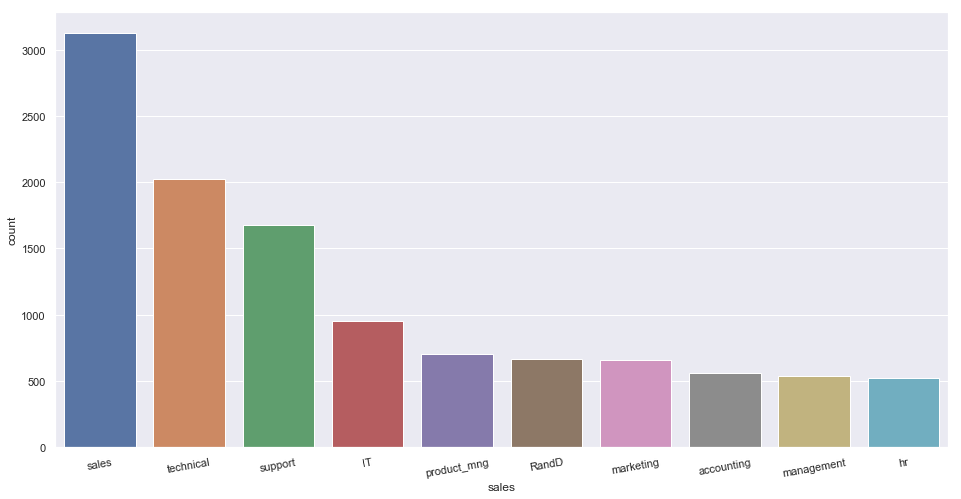

In [90]:
count_bar = sns.barplot(
    x=count_by_dep['sales'], 
    y=count_by_dep['count'])

for item in count_bar.get_xticklabels(): 
    item.set_rotation(10)

In [94]:
count_by_dep = data[data['left']==0].groupby(
    'sales').count()[['salary']].rename(columns={
    "salary":"count"}).reset_index().sort_values(by='count', ascending=False)

count_by_dep.style.bar()

,sales,count
7,sales,3126
9,technical,2023
8,support,1674
0,IT,954
6,product_mng,704
1,RandD,666
5,marketing,655
2,accounting,563
4,management,539
3,hr,524


**Вывод:**
- Самый многочисленный департамент - Продаж (sales)
- Самый малочисленный департамент - Управление персоналом (hr)

## 7. Показать распределение сотрудников по зарплатам

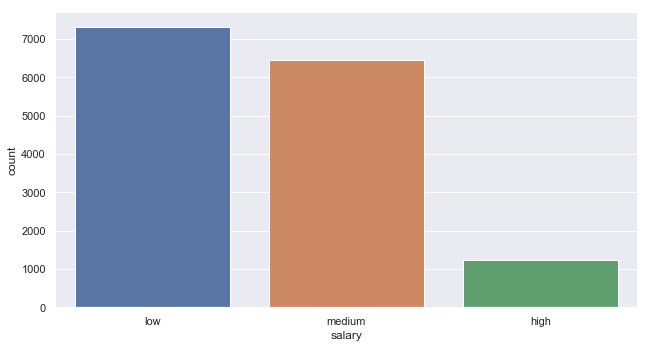

In [123]:
sns.catplot(x='salary', kind='count', data=data, aspect=1.8, order=['low', 'medium', 'high'])
plt.show()

In [134]:
display(data.salary.value_counts(normalize=True)*100)

low       48.776585
medium    42.976198
high       8.247216
Name: salary, dtype: float64

Вывод:
- Сотрудников с большой зарплатой - 8.24% от общего числа
- Сотрудников с средней зарплатой - 42.97% от общего числа
- Сотрудников с низкой зарплатой - 48.77% от общего числа

## 8. Показать распределение сотрудников по зарплатам совместно с департаментами

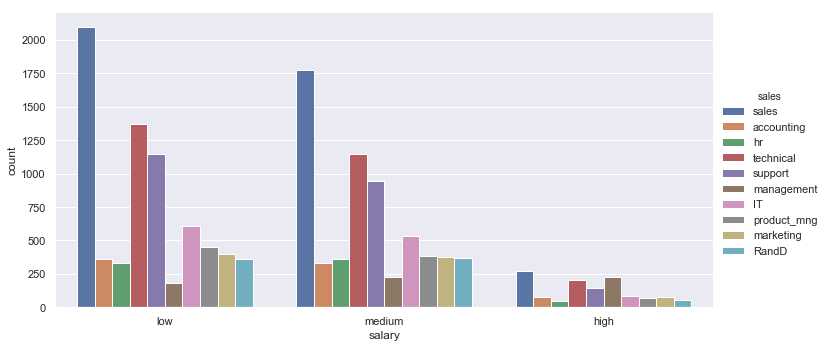

In [146]:
sns.catplot(x='salary', kind='count', data=data, hue='sales', aspect=2, order=['low', 'medium', 'high'])
plt.show()

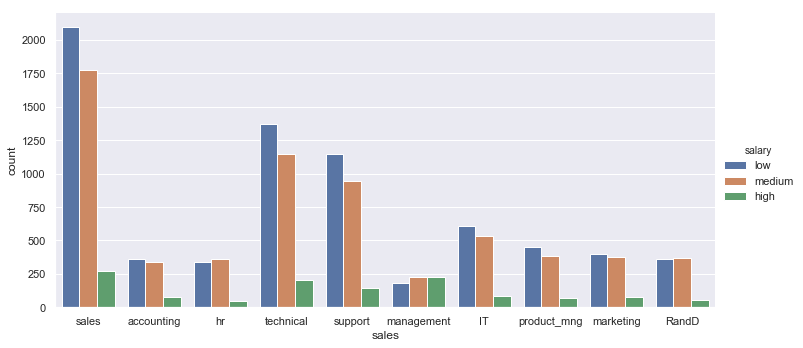

In [141]:
sns.catplot(x='sales', kind='count', data=data, hue='salary', aspect=2)
plt.show()

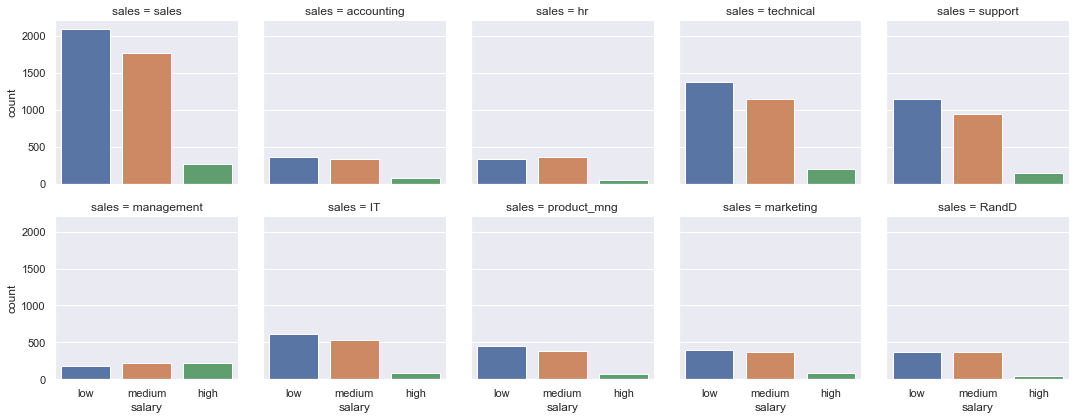

In [153]:
sns.catplot(x='salary', kind='count', data=data, col='sales', col_wrap=5, height=3)
plt.show()

In [190]:
salary_department = data.groupby(
    ['sales', 'salary']).count()[['left']].rename(
    columns={"left":"salary_department"}).reindex(
    level=1, index = ['high', 'medium', 'low'])

salary_department.style.bar()

**Вывод:**
- Большее количество сотрудников с высокими зарплатами в департаменте Продаж (sales) - 269
- Наименьшее количество сотрудников с высокими зарплатами в дапартаменте Управление персоналом (hr) - 45

## 9. Сколько сотрудников покинули компанию

[11428, 3571]


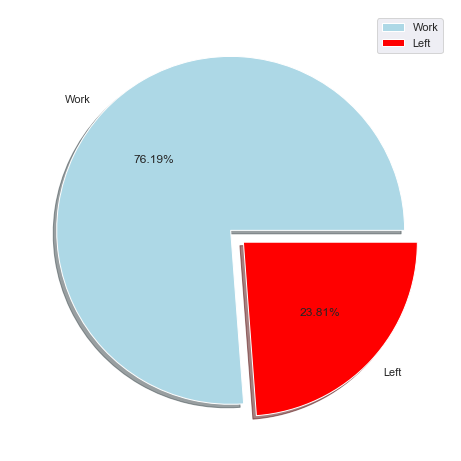

In [189]:
rcParams['figure.figsize'] = 10, 8

size = list(data['left'].value_counts())
print(size)

colors = ['lightBlue', 'red']
labels = "Work", "Left"
explode = [0, 0.1]

plt.pie(size, colors = colors, labels = labels, autopct = '%.2f%%', explode = explode, shadow = True)
plt.legend()
plt.show()

**Итого по 14999 сотрудникам:**
- 11428 (76.19%) сотрудников - работают
- 3571 (23.81%) сотрудников - уволились

## 10. Проверить несколько гипотез для данных, чтобы понять почему сотрудники покидают компанию

In [233]:
data_t.groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary_class
left,,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251,1.650945
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321,1.414730


In [238]:
print(stats.ttest_ind(data_t[data_t['left']==1]['satisfaction_level'], data_t[data_t['left']==0]['satisfaction_level']))
print(stats.ttest_ind(data_t[data_t['left']==1]['average_montly_hours'], data_t[data_t['left']==0]['average_montly_hours']))
print(stats.ttest_ind(data_t[data_t['left']==1]['promotion_last_5years'], data_t[data_t['left']==0]['promotion_last_5years']))
print(stats.ttest_ind(data_t[data_t['left']==1]['salary_class'], data_t[data_t['left']==0]['salary_class']))

Ttest_indResult(statistic=-51.61280155890104, pvalue=0.0)
Ttest_indResult(statistic=8.752254731850009, pvalue=2.3113035567540143e-18)
Ttest_indResult(statistic=-7.581195349367637, pvalue=3.624047224146943e-14)
Ttest_indResult(statistic=-19.58216626170969, pvalue=2.475238171818194e-84)


**Вывод:**
- У уволившихся уровень удовлетворенности меньше, чем у остальных
- Уволившиеся в среднем, в месяц больше часов работали
- Уволивщиеся намного реже получали повышение, за последние 5 лет работы

**_Проверяя статистическую значимость данных, при помощи t-test, p-value дала < 0.05_**

In [ ]:
pass